## Importing and understanding the dataset

In [ ]:
!pip -q install kaggle

In [ ]:
from google.colab import files
files.upload()  # choose kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dewashishlambore07","key":"8a99d69bcf9c031bc3305daf958c713a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle --version  # quick sanity check

Kaggle API 1.7.4.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# choose a download directory (Drive or local)
DOWNLOAD_DIR = '/content/drive/MyDrive/kaggle-data'  # persistent
# DOWNLOAD_DIR = '/content/data'  # <- use this instead if you don't want Drive
import os, pathlib
pathlib.Path(DOWNLOAD_DIR).mkdir(parents=True, exist_ok=True)
print('Saving to:', DOWNLOAD_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving to: /content/drive/MyDrive/kaggle-data


In [ ]:
DATASET_SLUG = 'adarshsng/lending-club-loan-data-csv'  # <- change me if needed

# Download and unzip straight into DOWNLOAD_DIR
!kaggle datasets download -d {DATASET_SLUG} -p "{DOWNLOAD_DIR}" --unzip


Dataset URL: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv
License(s): DbCL-1.0
 97% 330M/339M [00:06<00:00, 37.0MB/s]
100% 339M/339M [00:06<00:00, 51.7MB/s]


In [ ]:
import os

for root, dirs, files in os.walk('.'):
    for f in files:
        print(os.path.join(root, f))

./kaggle (1).json
./kaggle.json
./.config/.last_update_check.json
./.config/default_configs.db
./.config/config_sentinel
./.config/active_config
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_opt_in_prompt.yaml
./.config/logs/2025.09.02/13.40.25.412517.log
./.config/logs/2025.09.02/13.40.24.646161.log
./.config/logs/2025.09.02/13.40.02.703385.log
./.config/logs/2025.09.02/13.39.41.819003.log
./.config/logs/2025.09.02/13.40.13.974509.log
./.config/logs/2025.09.02/13.40.12.652972.log
./.config/configurations/config_default
./drive/MyDrive/SS_PMT.pdf
./drive/MyDrive/MathsPMT.pdf
./drive/MyDrive/Untitled (7).pdf
./drive/MyDrive/HindiPMTT.pdf
./drive/MyDrive/IMG_20200818_103448.jpg
./drive/MyDrive/IMG_20200909_085331~2.jpg
./drive/MyDrive/VID-20200805-WA0001.mp4
./drive/MyDrive/IMG_20200916_163148.jpg
./drive/MyDrive/IMG_20200918_133207.jpg
./drive/MyDrive/IMG_20200919_111224.jpg
./drive/MyDrive/Edite

Dataset Importing is complete, now loading the master df.

In [ ]:
import pandas as pd

df = pd.read_csv('./loan.csv')
df.shape  # Check dataset dimensions


/tmp/ipython-input-351458407.py:3: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./loan.csv')


(169362, 145)

In [ ]:
print("Grade column exists:", 'grade' in df.columns)
print("Unique grades:", df['grade'].unique() if 'grade' in df.columns else "Missing")

Grade column exists: True
Unique grades: ['C' 'D' 'B' 'A' 'E' 'F' 'G']


In [ ]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
id,169362
member_id,169362
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
settlement_status,169358
settlement_date,169358
settlement_amount,169358
settlement_percentage,169358


The dataset has huge amount of features, a detailed study of them is needed. Then only relevant features have to be kept and all others are to be ignored.  

# **EDA**

In [ ]:
with pd.option_context('display.max_rows', None):
    feature_dtypes = df.dtypes.reset_index()
    feature_dtypes.columns = ["Feature", "DataType"]
    print(feature_dtypes)


                                        Feature DataType
0                                            id  float64
1                                     member_id  float64
2                                     loan_amnt    int64
3                                   funded_amnt    int64
4                               funded_amnt_inv  float64
5                                          term   object
6                                      int_rate  float64
7                                   installment  float64
8                                         grade   object
9                                     sub_grade   object
10                                    emp_title   object
11                                   emp_length   object
12                               home_ownership   object
13                                   annual_inc  float64
14                          verification_status   object
15                                      issue_d   object
16                             

Some columns had dtype conflict, converting to string for convinience.

In [ ]:
problematic_cols = [19,47,55,112,123,124,125,128,129,130,133,139,140,141]
dtype={col: str for col in problematic_cols}

In [ ]:
df.shape          # Rows, columns
df.info()         # Data types & non-null counts
df.describe()     # Basic statistics for numeric columns
  # For categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169362 entries, 0 to 169361
Columns: 145 entries, id to settlement_term
dtypes: float64(108), int64(2), object(35)
memory usage: 187.4+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,169362.000000,169362.000000,169362.000000,169362.000000,169362.000000,1.693610e+05,0.0,0.0,...,4.0,4.000000,4.0,4.0,4.000000,4.000000,4.000000,4.000000,4.0000,4.0
mean,NaN,NaN,16042.244423,16042.244423,16039.300797,12.897996,465.388538,8.241680e+04,NaN,NaN,...,3.0,271.807500,3.0,5.5,815.422500,21672.055000,335.115000,10622.500000,65.0025,18.0
std,NaN,NaN,10140.267923,10140.267923,10141.534639,5.154915,285.639685,1.048997e+05,NaN,NaN,...,0.0,127.347969,0.0,11.0,382.043907,13755.655347,493.094213,9035.347346,0.0050,0.0
min,NaN,NaN,1000.000000,1000.000000,725.000000,6.000000,30.480000,0.000000e+00,NaN,NaN,...,3.0,126.270000,3.0,0.0,378.810000,8096.800000,1.010000,3422.000000,65.0000,18.0
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,8.460000,253.780000,4.710000e+04,NaN,NaN,...,3.0,184.320000,3.0,0.0,552.960000,13538.087500,1.160000,4937.750000,65.0000,18.0
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,11.800000,387.660000,6.800000e+04,NaN,NaN,...,3.0,291.030000,3.0,0.0,873.090000,19221.035000,147.020000,7781.000000,65.0000,18.0
75%,NaN,NaN,22000.000000,22000.000000,22000.000000,16.140000,625.260000,9.850000e+04,NaN,NaN,...,3.0,378.517500,3.0,5.5,1135.552500,27355.002500,480.975000,13465.750000,65.0025,18.0
max,NaN,NaN,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,NaN,NaN,...,3.0,378.900000,3.0,22.0,1136.700000,40149.350000,1045.410000,23506.000000,65.0100,18.0


In [ ]:
with pd.option_context('display.max_columns', None):
    display(df.describe(include='object'))

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,169362,169362,169362,143297,154128,169362,169361,169361,169361,169361,169361,169361,169361,169361,169361,169361,169147,163980,169358,169361,19665,22405,169361,4,4,4,4,4,4,4,169361,169361,4,4,4
unique,2,7,35,55033,11,5,3,5,6,2,12,12,882,50,653,2,6,3,7,2,3,588,2,1,2,2,2,2,2,2,2,2,2,1,2
top,36 months,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,w,Feb-2019,Mar-2019,Feb-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,Cash,N,Feb-2019,ACTIVE,Feb-2019
freq,116198,50772,12465,2736,51810,83604,74589,46305,162092,169360,93270,93270,1807,23462,1481,150403,161456,163929,164462,146956,8404,203,169360,4,3,3,3,3,3,3,134907,169357,3,4,3


## **INSIGHTS**
1] Term has only 2 types, 36 months and 60 months<br>
2] The grades are primarily 7 and there exist 5 subgrades within each, implying 35 grade types<br>
3] There are more (31-120) days lates than (16-30) days<br>
4] pymnt plans is of two types n and y with huge disparity <br>


In [ ]:

df['pymnt_plan'].value_counts()

,count
pymnt_plan,
n,169360
y,1


Checking nulls now

In [ ]:
with pd.option_context('display.max_rows', None):
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100
    display(null_percentages.sort_values(ascending=False))

,0
id,100.000000
member_id,100.000000
url,100.000000
desc,100.000000
hardship_start_date,99.997638
hardship_loan_status,99.997638
orig_projected_additional_accrued_interest,99.997638
deferral_term,99.997638
hardship_status,99.997638
settlement_status,99.997638


# **WHAT IS DROPPED AND WHY? ⛔**

Dropping the entirely null columns, no value added by them to us.

In [ ]:
drop_cols = [
    'id', 'member_id', 'url', 'desc'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Hardship-Related Columns (~99%):

hardship_amount

hardship_status

hardship_start_date

hardship_end_date

hardship_length

hardship_reason

hardship_type

hardship_last_payment_amount

hardship_payoff_balance_amount

hardship_loan_status

hardship_dpd

payment_plan_start_date

*These are rarest of rare case hence putting them into the model isnt something that would work. Overfitting would happen, hencing dropping them.*

# Debt Settlement Columns (~98%)

debt_settlement_flag_date

settlement_status

settlement_date

settlement_amount

settlement_percentage

settlement_term

*A debt settlment is a post loan operation, its relevance at time of applying and predicting interest rate is close to zero. Hence to be better dropped.*

# Secondary Applicant Columns (~95%)

sec_app_earliest_cr_line

sec_app_inq_last_6mths

sec_app_mort_acc

sec_app_open_acc

sec_app_open_act_il

sec_app_num_rev_accts

sec_app_revol_util

sec_app_chargeoff_within_12_mths

sec_app_collections_12_mths_ex_med

sec_app_mths_since_last_major_derog

revol_bal_joint

annual_inc_joint

dti_joint

verification_status_joint

*Joint applicant is a rare case and for initial modelling isnt a good idea to keep. Hence dropping them*

In [ ]:
# List of columns to drop
cols_to_drop = [
    # Hardship-Related Columns (~99%)
    'hardship_amount',
    'hardship_status',
    'hardship_start_date',
    'hardship_end_date',
    'hardship_length',
    'hardship_reason',
    'hardship_type',
    'hardship_last_payment_amount',
    'hardship_payoff_balance_amount',
    'hardship_loan_status',
    'hardship_dpd',
    'payment_plan_start_date',

    # Debt Settlement Columns (~98%)
    'debt_settlement_flag_date',
    'settlement_status',
    'settlement_date',
    'settlement_amount',
    'settlement_percentage',
    'settlement_term',

    # Secondary Applicant Columns (~95%)
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_revol_util',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'sec_app_mths_since_last_major_derog',
    'revol_bal_joint',

    'dti_joint',

    'orig_projected_additional_accrued_interest',

    'deferral_term'
]

# Drop these columns safely
df = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Dropped {len(cols_to_drop)} columns. New shape: {df.shape}")

Dropped 32 columns. New shape: (169362, 109)


# **WHAT I HAVE DECIDED TO KEEP AND WHY? ✅**

mths_since_last_record (~84%)

mths_since_recent_bc_dlq (~77%)

mths_since_last_major_derog (~74%)

annual_inc_joint	(~94%)

verification_status_joint	(~94%)

il_util	(~47%)

mths_since_rcnt_il	(~40%)

all_util	(~38%)

inq_last_12m	(~38%)

total_bal_il	(~38%)

max_bal_bc	(~38%)

*All these have high null percentages but they are crucial factors in a real life lending scenario hence i have kept them.*

## Handling missing values in the retained **columns**

In [ ]:
derog_cols = [
    'mths_since_last_record',
    'mths_since_recent_bc_dlq',
    'mths_since_last_major_derog'
]
df[derog_cols] = df[derog_cols].fillna(0)

In derogatory columns if there is nothing it indicated no such incident happened. Hence filling them with zeroes.

In [ ]:
df['annual_inc_joint'] = df['annual_inc_joint'].fillna(0)
df['verification_status_joint'] = df['verification_status_joint'].fillna('Not Applicable')


If there is not info in a joint section, single borrower case is assumed. Therefore replacing them with apprpriate value types.

In [ ]:
util_cols = ['il_util', 'all_util', 'total_bal_il', 'max_bal_bc']
for col in util_cols:
    df[col] = df[col].fillna(df[col].median())

Filled the util columns with median value as if replaced with 0 could increase bias of the dataset.

In [ ]:
df['mths_since_rcnt_il'] = df['mths_since_rcnt_il'].fillna(999)
df['inq_last_12m'] = df['inq_last_12m'].fillna(0)

if there is no given months since recent il then it is replaced by very high value to show that it is long pending. If inq_last_12m isnt given it is assumed no inquiery was made, hence replaced with 0.

In [ ]:
with pd.option_context('display.max_rows', None):
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100
    display(null_percentages.sort_values(ascending=False))

,0
mths_since_recent_revol_delinq,71.411533
mths_since_last_delinq,56.297162
emp_title,15.390111
mths_since_recent_inq,12.490996
emp_length,8.994934
mo_sin_old_il_acct,3.502557
next_pymnt_d,3.177808
num_tl_120dpd_2m,2.521817
bc_util,1.355676
percent_bc_gt_75,1.310211


In [ ]:
date_cols = ['next_pymnt_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

/tmp/ipython-input-3465418373.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3465418373.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3465418373.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3465418373.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and

In [ ]:
df['next_pymnt_d_missing'] = df['next_pymnt_d'].isnull().astype(int)
df['next_pymnt_d'] = df['next_pymnt_d'].fillna(df['next_pymnt_d'].max())

In [ ]:
months_cols = [ 'mths_since_recent_inq', 'mths_since_rcnt_il', 'mths_since_recent_revol_delinq',
                'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_recent_bc',
                'mths_since_recent_bc_dlq', 'mths_since_last_major_derog' ]

for col in months_cols:
    df[col] = df[col].fillna(0)

numeric_cols = [ 'bc_util', 'revol_util', 'dti', 'inq_fi', 'inq_last_12m', 'tot_cur_bal',
                'total_rev_hi_lim', 'avg_cur_bal', 'total_bc_limit', 'total_bal_ex_mort',
                'total_il_high_credit_limit', 'tot_hi_cred_lim', 'open_il_12m', 'open_il_24m',
                'open_act_il', 'num_rev_accts', 'num_bc_sats', 'num_sats', 'mo_sin_old_il_acct',
                'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
                'percent_bc_gt_75', 'pct_tl_nvr_dlq' ]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
df['emp_title'] = df['emp_title'].fillna("Unknown")
df['title'] = df['title'].fillna("Unknown")
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])


In [ ]:
binary_cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens',
               'pub_rec_bankruptcies', 'pub_rec', 'acc_now_delinq', 'delinq_amnt',
               'inq_last_6mths', 'delinq_2yrs']

for col in binary_cols:
    df[col] = df[col].fillna(0)


In [ ]:
missing_after = df.isnull().mean().sort_values(ascending=False)
print(missing_after[missing_after > 0])


emp_length                 0.089949
num_tl_120dpd_2m           0.025218
bc_open_to_buy             0.013096
last_pymnt_d               0.001269
last_credit_pull_d         0.000024
verification_status        0.000006
addr_state                 0.000006
purpose                    0.000006
revol_bal                  0.000006
open_acc                   0.000006
pymnt_plan                 0.000006
loan_status                0.000006
annual_inc                 0.000006
issue_d                    0.000006
collection_recovery_fee    0.000006
total_rec_prncp            0.000006
recoveries                 0.000006
total_rec_late_fee         0.000006
last_pymnt_amnt            0.000006
total_acc                  0.000006
earliest_cr_line           0.000006
total_rec_int              0.000006
initial_list_status        0.000006
total_pymnt                0.000006
total_pymnt_inv            0.000006
debt_settlement_flag       0.000006
num_tl_30dpd               0.000006
num_tl_90g_dpd_24m         0

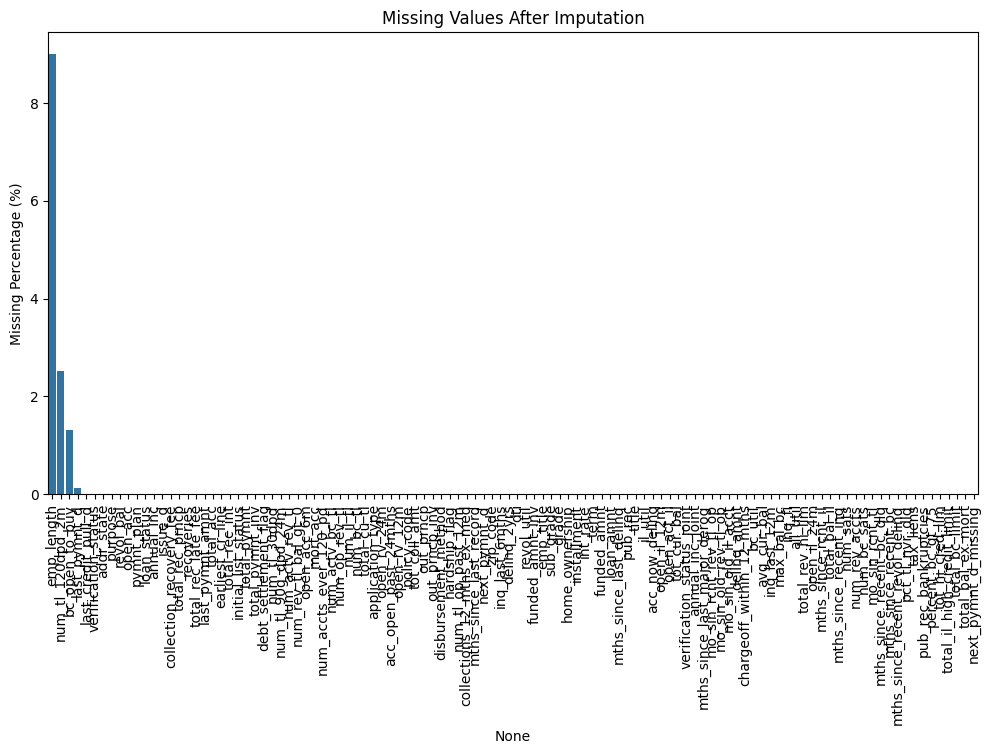

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x=missing_after.index, y=missing_after.values*100)
plt.xticks(rotation=90)
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values After Imputation")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# 1. Columns to fill with median
median_cols = [
    'total_cu_tl', 'open_acc_6m', 'open_rv_12m', 'open_rv_24m',
    'bc_open_to_buy', 'tot_coll_amt', 'num_actv_bc_tl', 'num_op_rev_tl',
    'num_il_tl', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m',
    'num_accts_ever_120_pd', 'num_bc_tl', 'mort_acc', 'acc_open_past_24mths',
    'open_acc', 'total_acc', 'annual_inc'
]
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

# 2. Columns to fill with zero (missing = "no such event")
zero_cols = ['num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd']
for col in zero_cols:
    df[col] = df[col].fillna(0)

# 3. Categorical columns → use mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

# 4. Date columns → use mode (most common date)
date_cols = ['last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# 5. Verify missingness after imputation
missing_after = df[median_cols + zero_cols + ['emp_length'] + date_cols].isnull().mean().sort_values(ascending=False)
print("Remaining missing values:\n", missing_after[missing_after > 0])


Remaining missing values:
 Series([], dtype: float64)


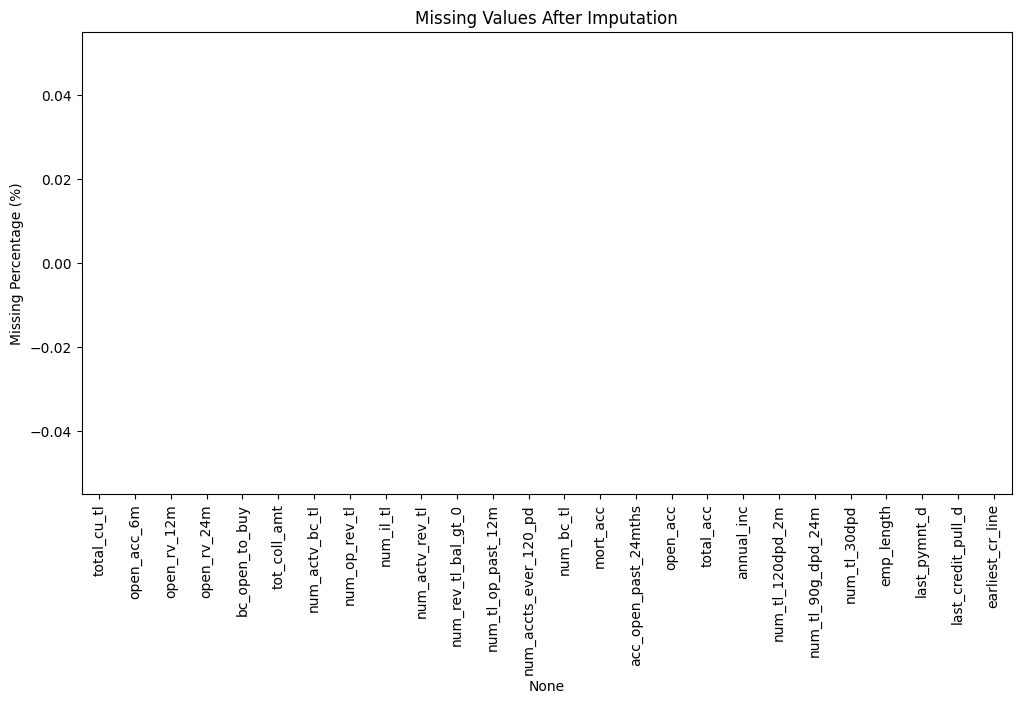

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=missing_after.index, y=missing_after.values*100)
plt.xticks(rotation=90)
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values After Imputation")
plt.show()


## **Our final goal is interest rates prediction, so understanding it:[link text]**

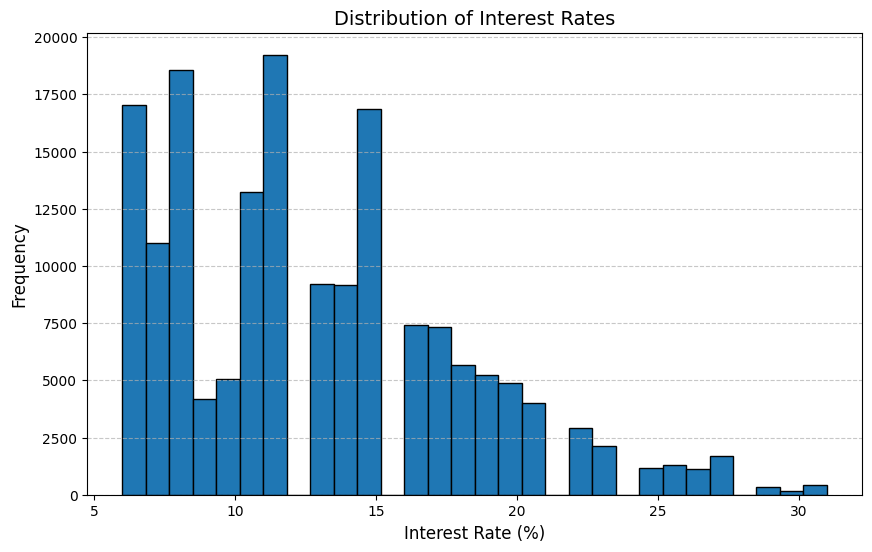

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for interest rate distribution
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, edgecolor='black')
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Interest Rates", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



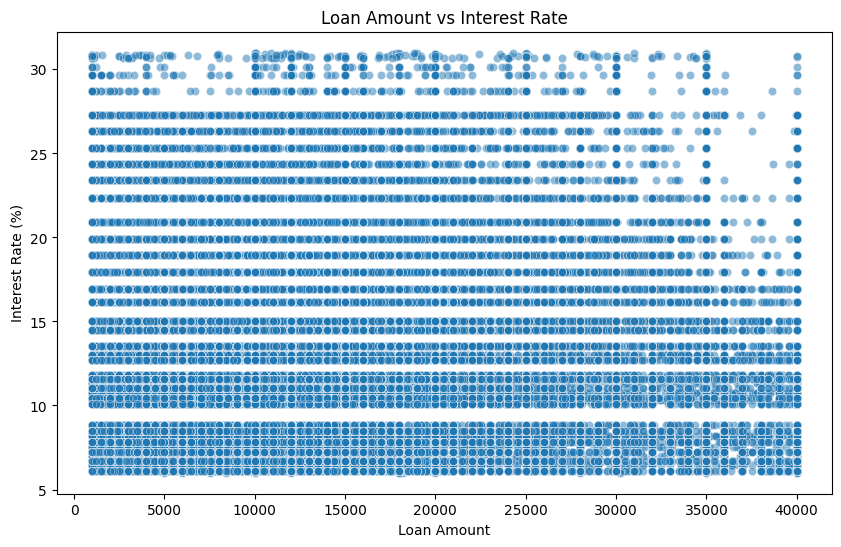

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df, alpha=0.5)
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate (%)")
plt.title("Loan Amount vs Interest Rate")
plt.show()


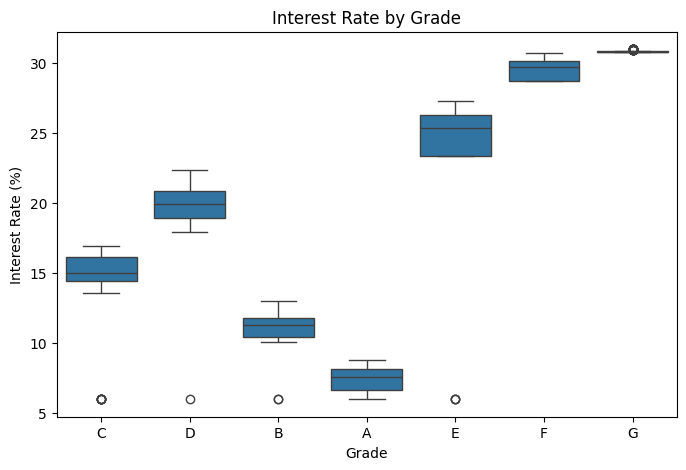

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='grade', y='int_rate', data=df)
plt.xlabel("Grade")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate by Grade")
plt.show()


In [ ]:
print("Shape of dataset:", df.shape)
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nTop 5 rows:")
display(df.head())

Shape of dataset: (169362, 110)

Total Missing Values: 23

Top 5 rows:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,next_pymnt_d_missing
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N,0
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N,0
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N,0
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N,0


In [ ]:
# Convert date columns to datetime
date_cols = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical features to 'category' dtype
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify
print("Categorical columns:", categorical_cols)
print("Numeric columns:", df.select_dtypes(include=['int64','float64']).columns.tolist())

Categorical columns: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
Numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_sinc

In [ ]:
with pd.option_context('display.max_rows', None):
    feature_dtypes = df.dtypes.reset_index()
    feature_dtypes.columns = ["Feature", "DataType"]
    print(feature_dtypes)


                            Feature        DataType
0                         loan_amnt           int64
1                       funded_amnt           int64
2                   funded_amnt_inv         float64
3                              term        category
4                          int_rate         float64
5                       installment         float64
6                             grade        category
7                         sub_grade        category
8                         emp_title        category
9                        emp_length        category
10                   home_ownership        category
11                       annual_inc         float64
12              verification_status        category
13                          issue_d        category
14                      loan_status        category
15                       pymnt_plan        category
16                          purpose        category
17                            title        category
18          

In [ ]:
df['grade'].unique()

['C', 'D', 'B', 'A', 'E', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
import numpy as np

#Handling serious outlier
col = "mths_since_rcnt_il"
if col in df.columns:
    # Find a safe cap value at 95th percentile
    cap_value = df[col].dropna().quantile(0.95)
    df[col] = df[col].fillna(cap_value)

In [ ]:
#Dropping post loan processes.
post_loan_cols = [
    "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
    "recoveries", "collection_recovery_fee", "last_pymnt_d",
    "last_pymnt_amnt", "next_pymnt_d", "next_pymnt_d_missing",
    "out_prncp", "out_prncp_inv"
]

df = df.drop(columns=[col for col in post_loan_cols if col in df.columns])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==============================================================================
# PART 1: DATA LOADING AND INITIAL CLEANING (Based on your EDA)
# ==============================================================================
print("--- Part 1: Loading and Initial Cleaning ---")

# Load the dataset
# Using low_memory=False helps prevent DtypeWarning for this large, mixed-type dataset
try:
    df = pd.read_csv('loan.csv', low_memory=False)
    print(f"Successfully loaded loan.csv. Initial shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'loan.csv' not found. Please ensure the file is in the correct directory.")
    exit()



--- Part 1: Loading and Initial Cleaning ---
Successfully loaded loan.csv. Initial shape: (1259802, 145)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'sub_grade' in df.columns:
    # Sort the sub_grades for a clean, ordered plot
    sub_grade_order = sorted(df['sub_grade'].unique())

    plt.figure(figsize=(16, 8))
    sns.boxplot(x='sub_grade', y='int_rate', data=df, order=sub_grade_order, palette='viridis')
    plt.title('Interest Rate vs. Loan Sub-Grade', fontsize=16)
    plt.xlabel('Loan Sub-Grade', fontsize=12)
    plt.ylabel('Interest Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Warning: 'sub_grade' column not found for visualization.")

/tmp/ipython-input-282934466.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='purpose', data=df, order=df['purpose'].value_counts().index, palette='magma')


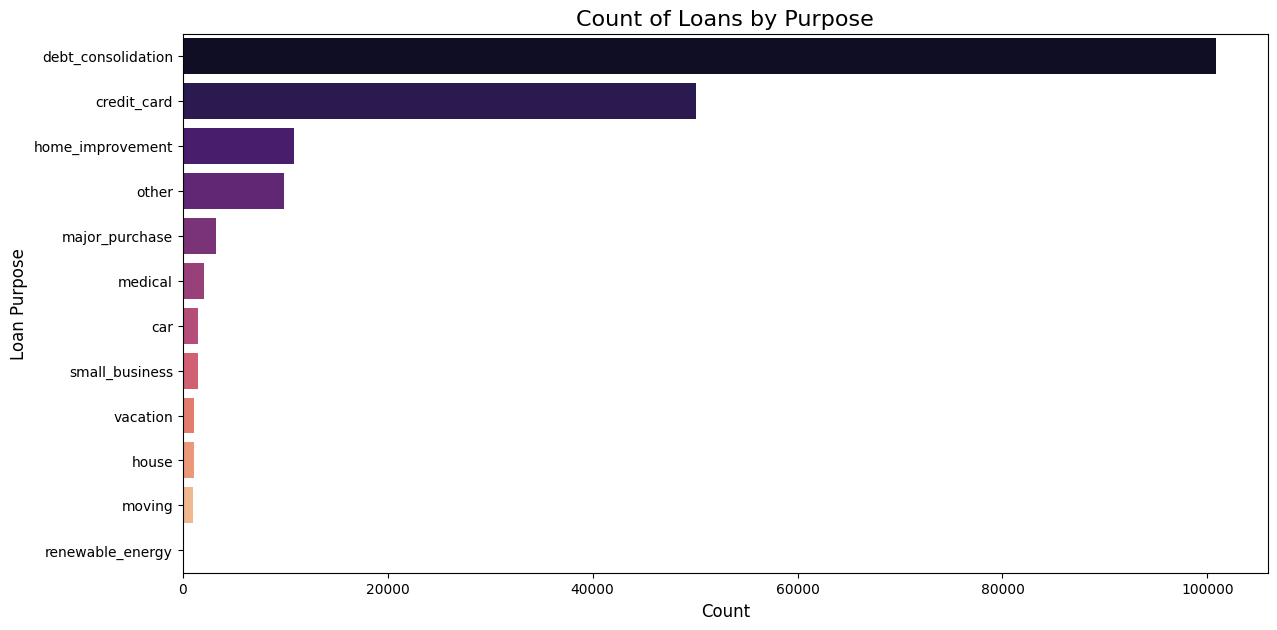

In [ ]:
# ==============================================================================
# 2. Fixed: Purpose of the Loans Visualization
# ==============================================================================
# Check if 'purpose' column exists before plotting
if 'purpose' in df.columns:
    plt.figure(figsize=(14, 7))
    sns.countplot(y='purpose', data=df, order=df['purpose'].value_counts().index, palette='magma')
    plt.title('Count of Loans by Purpose', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Loan Purpose', fontsize=12)
    plt.show()
else:
    print("Warning: 'purpose' column not found for visualization.")

In [ ]:
# Display all the unique values in the 'addr_state' column
print(sorted(df['addr_state'].unique()))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [ ]:
import plotly.express as px

# ==============================================================================
# 3. Fixed: Geographical Analysis (Interactive Map)
# ==============================================================================
# Check if 'addr_state' column exists before plotting
if 'addr_state' in df.columns:
    # Group data by state and calculate the average interest rate
    state_avg_rate = df.groupby('addr_state')['int_rate'].mean().reset_index()

    # Create the interactive choropleth map
    fig = px.choropleth(
        state_avg_rate,
        locations='addr_state',
        locationmode="USA-states",
        color='int_rate',
        scope="usa",
        color_continuous_scale="YlOrRd",
        title="Average Loan Interest Rate by State",
        labels={'int_rate': 'Avg. Interest Rate (%)'}
    )
    fig.show()
else:
    print("Warning: 'addr_state' column not found for visualization.")

In [ ]:
# --- CORRECTED DROP LIST ---
# 'emp_title' is REMOVED from this initial list.
# We also keep 'installment' and 'sub_grade' out to fix the data leakage.
cols_to_drop = [
    # Identifiers & Leaking Features
    'id', 'member_id', 'url', 'desc', 'installment', 'sub_grade',
    # Hardship-Related Columns
    'hardship_amount', 'hardship_status', 'hardship_start_date', 'hardship_end_date',
    'hardship_length', 'hardship_reason', 'hardship_type', 'hardship_last_payment_amount',
    'hardship_payoff_balance_amount', 'hardship_loan_status', 'hardship_dpd',
    'payment_plan_start_date',
    # Debt Settlement Columns
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
    'settlement_amount', 'settlement_percentage', 'settlement_term',
    # Secondary Applicant Columns
    'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
    'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
    'sec_app_revol_util', 'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
    'revol_bal_joint', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'orig_projected_additional_accrued_interest', 'deferral_term',
    # Post-loan feature columns (leakage)
    "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
    "recoveries", "collection_recovery_fee", "last_pymnt_d",
    "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d",

    "out_prncp", "out_prncp_inv"
]
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped {len(cols_to_drop)} columns. New shape: {df.shape}")

Dropped 52 columns. New shape: (1259802, 93)


In [ ]:

# ==============================================================================
# PART 2: MISSING VALUE IMPUTATION (This will now work correctly)
# ==============================================================================
print("\n--- Part 2: Imputing Missing Values ---")

# Impute derogatory columns
derog_cols = ['mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_last_delinq']
for col in derog_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)
print("Filled derogatory columns with 0.")

# Impute employment info (This line will no longer cause an error)
df['emp_title'] = df['emp_title'].fillna("Unknown")
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
print("Filled missing employment info.")

# Impute remaining numerical and object columns
numeric_cols_with_nulls = df.select_dtypes(include=np.number).isnull().sum()
numeric_cols_with_nulls = numeric_cols_with_nulls[numeric_cols_with_nulls > 0].index.tolist()
for col in numeric_cols_with_nulls:
    df[col] = df[col].fillna(df[col].median())
print(f"Filled {len(numeric_cols_with_nulls)} numeric columns with their median.")

object_cols_with_nulls = df.select_dtypes(include=['object', 'category']).isnull().sum()
object_cols_with_nulls = object_cols_with_nulls[object_cols_with_nulls > 0].index.tolist()
for col in object_cols_with_nulls:
    df[col] = df[col].fillna(df[col].mode()[0])

print("No missing values remain.")


--- Part 2: Imputing Missing Values ---
Filled derogatory columns with 0.
Filled missing employment info.
Filled 34 numeric columns with their median.
No missing values remain.


In [ ]:

# ==============================================================================
# PART 3: FEATURE ENGINEERING & FINAL PREPARATION
# ==============================================================================
print("\n--- Part 3: Feature Engineering and Final Preparation ---")

# Clean target variable and key features
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
df['term'] = df['term'].str.strip().str.replace(' months', '').astype(int)

# Engineer emp_length
emp_length_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10, 'n/a': 0}
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

# Engineer date features
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['credit_history_length'].fillna(df['credit_history_length'].median(), inplace=True)

# --- FINAL DROP LIST ---
# Now is the correct time to drop emp_title, along with other unneeded columns
cols_to_drop_final = ['issue_d', 'earliest_cr_line', 'grade', 'title', 'zip_code', 'emp_title']
df.drop(columns=cols_to_drop_final, inplace=True, errors='ignore')
print("Dropped final set of columns including 'emp_title'.")

# One-hot encode remaining categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print(f"One-hot encoding complete. Final shape: {df.shape}")



--- Part 3: Feature Engineering and Final Preparation ---


KeyError: 'issue_d'

In [ ]:
print("\n--- Part 4: Splitting and Scaling Data ---")

# 4a. Separate features (X) and target (y)
y = df['int_rate']
X = df.drop(columns='int_rate')
print(f"Shape of X (features): {X.shape}, Shape of y (target): {y.shape}")

# 4b. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# 4c. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Feature scaling complete.")
print("\nSample of scaled training data:")
print(X_train_scaled.head())

# ==============================================================================
# FINAL OUTPUT: Your data is ready!
# ==============================================================================
print("\n\n✅ Data preparation complete!")
print("You can now use the following variables for model training:")
print(f" - X_train_scaled: (Shape: {X_train_scaled.shape})")
print(f" - y_train: (Shape: {y_train.shape})")
print(f" - X_test_scaled: (Shape: {X_test_scaled.shape})")
print(f" - y_test: (Shape: {y_test.shape})")


--- Part 4: Splitting and Scaling Data ---
Shape of X (features): (1259802, 155), Shape of y (target): (1259802,)
X_train shape: (1007841, 155), X_test shape: (251961, 155)
Feature scaling complete.

Sample of scaled training data:
        loan_amnt  funded_amnt  funded_amnt_inv      term  emp_length  \
461053  -0.039636    -0.039633        -0.039082 -0.643776    0.471182   
985945  -0.572756    -0.572753        -0.572296 -0.643776   -1.399634   
892202  -0.039636    -0.039633        -0.039082 -0.643776    1.005701   
115947  -0.359508    -0.359505        -0.359010 -0.643776    0.738442   
492004   0.919981     0.919983         0.920703 -0.643776    1.005701   

        annual_inc       dti  delinq_2yrs  inq_last_6mths  \
461053   -0.406717 -0.293226    -0.350986       -0.634866   
985945    2.322181 -1.206480     0.795650       -0.634866   
892202    0.223303  0.369922    -0.350986       -0.634866   
115947    0.922138 -0.887981     1.942286       -0.634866   
492004   -0.288069  0.4

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set a visually appealing style for the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

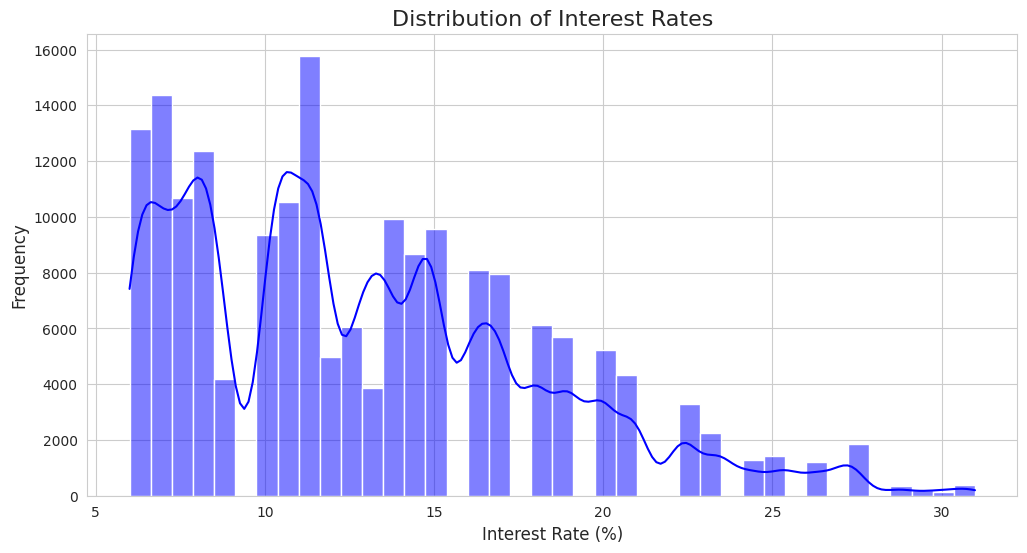

In [ ]:
# Plotting the distribution of the interest rate
plt.figure(figsize=(12, 6))
sns.histplot(df['int_rate'], kde=True, bins=40, color='blue')
plt.title('Distribution of Interest Rates', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<Figure size 1200x700 with 0 Axes>

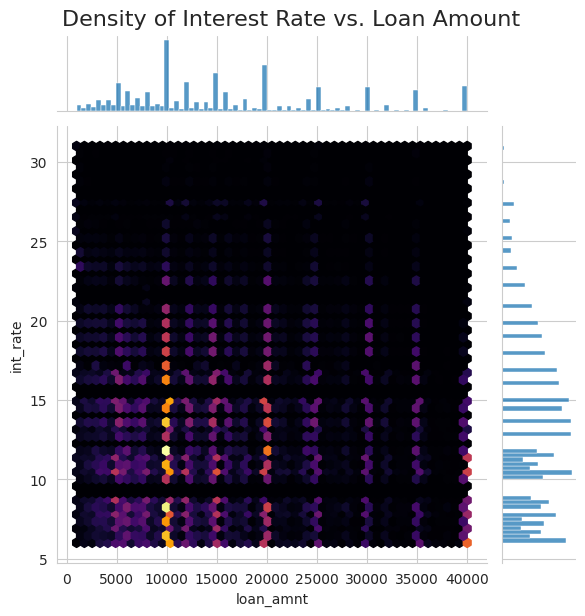

In [ ]:
plt.figure(figsize=(12, 7))
sns.jointplot(x='loan_amnt', y='int_rate', data=df, kind='hex', gridsize=50, cmap='inferno')
plt.suptitle('Density of Interest Rate vs. Loan Amount', y=1.02, fontsize=16)
plt.show()

/tmp/ipython-input-4256629792.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




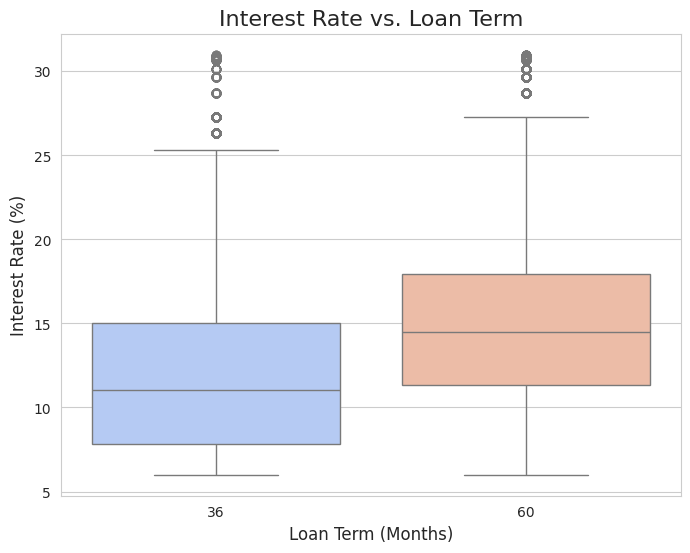

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='term', y='int_rate', data=df, palette='coolwarm')
plt.title('Interest Rate vs. Loan Term', fontsize=16)
plt.xlabel('Loan Term (Months)', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

In [ ]:
# Select a subset of important numerical columns for a cleaner heatmap
corr_cols = [
    'int_rate', 'loan_amnt', 'funded_amnt', 'term', 'installment',
    'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'credit_history_length'
]

# Calculate the correlation matrix
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()

KeyError: "['installment'] not in index"

--- Method 1: Visual Heatmap of Key Features ---


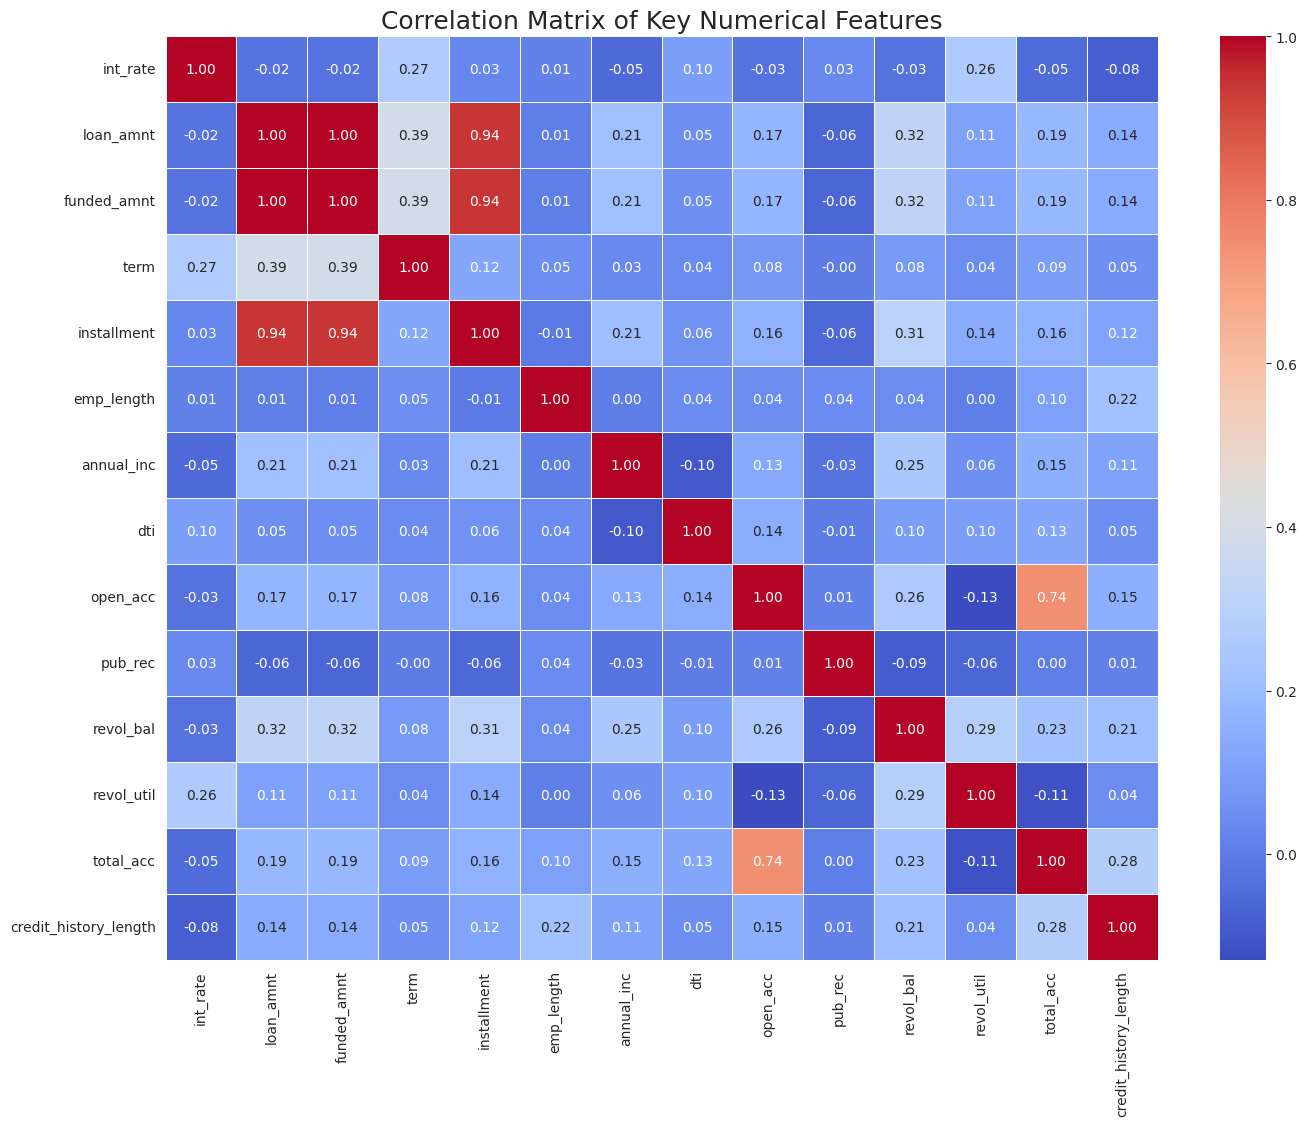



--- Method 2: Top Features Correlated with 'int_rate' ---
--- Top 15 POSITIVELY Correlated Features with Interest Rate ---
all_util            0.290239
percent_bc_gt_75    0.281780
bc_util             0.280849
sub_grade_E5        0.279740
term                0.268130
revol_util          0.263034
sub_grade_D5        0.246718
sub_grade_D4        0.240221
sub_grade_D3        0.232643
sub_grade_E1        0.226686
sub_grade_E3        0.212579
sub_grade_E4        0.212112
sub_grade_D2        0.209105
sub_grade_E2        0.186230
sub_grade_D1        0.182135
Name: int_rate, dtype: float64


--- Top 15 NEGATIVELY Correlated Features with Interest Rate ---
pct_tl_nvr_dlq                  -0.124205
purpose_credit_card             -0.184817
total_rev_hi_lim                -0.209707
sub_grade_A5                    -0.210896
sub_grade_A3                    -0.243993
total_bc_limit                  -0.249510
sub_grade_A2                    -0.258971
sub_grade_A4                    -0.266495
bc_ope

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- IMPORTANT ---
# Run this code on your 'df' DataFrame *after* all cleaning and feature engineering,
# but *before* splitting into X/y and scaling.

# ==============================================================================
# Method 1: Visual Heatmap of Key Numerical Features
# ==============================================================================
print("--- Method 1: Visual Heatmap of Key Features ---")

# Select a subset of the most important numerical columns for a readable heatmap.
# These are features that existed before one-hot encoding.
key_features = [
    'int_rate', 'loan_amnt', 'funded_amnt', 'term', 'installment',
    'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'credit_history_length',
    'fico_range_high', 'fico_range_low'
]

# Create a subset DataFrame and calculate its correlation matrix
# We check if the column exists in the df before including it
key_features_exist = [col for col in key_features if col in df.columns]
corr_matrix = df[key_features_exist].corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    annot=True,          # Write the data value in each cell
    fmt='.2f',           # Use two decimal places
    cmap='coolwarm',     # A diverging colormap (red for positive, blue for negative)
    linewidths=.5,       # Add lines between cells
    annot_kws={"size": 10} # Adjust font size of annotations
)

plt.title('Correlation Matrix of Key Numerical Features', fontsize=18)
plt.show()


# ==============================================================================
# Method 2: Top Features Correlated with Interest Rate
# ==============================================================================
print("\n\n--- Method 2: Top Features Correlated with 'int_rate' ---")

# Calculate the correlation of all features with the target variable 'int_rate'
# We use the full DataFrame here to see the impact of one-hot encoded features too.
full_corr_with_target = df.corr()['int_rate'].sort_values(ascending=False)

# Remove the self-correlation (int_rate with itself)
full_corr_with_target = full_corr_with_target.drop('int_rate')

print("--- Top 15 POSITIVELY Correlated Features with Interest Rate ---")
print(full_corr_with_target.head(15))

print("\n\n--- Top 15 NEGATIVELY Correlated Features with Interest Rate ---")
print(full_corr_with_target.tail(15))

In [ ]:
# Check for any other columns with zero variance and drop them
cols_to_drop = X_train.columns[X_train.nunique() <= 1]
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns with no variance: {list(cols_to_drop)}")

Dropped 5 columns with no variance: ['policy_code', 'acc_now_delinq', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'tax_liens']


# LINEAR REGRES

In [ ]:
leak_cols=['id', 'member_id', 'url', 'desc', 'installment', 'sub_grade']
df.drop(columns=leak_cols, inplace=True, errors='ignore')

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already created and scaled data is available
# For clarity, let's work with the scaled DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Check for any columns with zero variance (constant value) in the training set
cols_to_drop = X_train_scaled_df.columns[X_train_scaled_df.nunique() <= 1]

if not cols_to_drop.empty:
    print(f"Dropping {len(cols_to_drop)} constant columns: {list(cols_to_drop)}")
    X_train_final = X_train_scaled_df.drop(columns=cols_to_drop)
    X_test_final = X_test_scaled_df.drop(columns=cols_to_drop)
else:
    print("No constant columns to drop. Proceeding with all features.")
    X_train_final = X_train_scaled_df
    X_test_final = X_test_scaled_df

No constant columns to drop. Proceeding with all features.


In [ ]:
from sklearn.linear_model import LinearRegression
import time # To time our model training

# --- Train the Model ---
print("\n--- Training Linear Regression Model ---")
# Instantiate the model
lr_model = LinearRegression()

# Start the timer
start_time = time.time()

# Train the model using the scaled training data
lr_model.fit(X_train_final, y_train)

# Stop the timer
end_time = time.time()
lr_training_time = end_time - start_time
print(f"Training completed in {lr_training_time:.2f} seconds.")

# --- Make Predictions ---
print("Making predictions on the test set...")
lr_preds = lr_model.predict(X_test_final)


--- Training Linear Regression Model ---
Training completed in 6.14 seconds.
Making predictions on the test set...


In [ ]:
# (Assuming the evaluate_model function from our previous discussion is available)
# If not, here it is again:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    """Calculates and prints regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f} (Avg. prediction is off by {mae:.2f} percentage points)")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 35)
    return {'R2': r2, 'MAE': mae, 'RMSE': rmse}

# --- Evaluate the Model ---
lr_performance = evaluate_model(y_test, lr_preds, "Linear Regression")


--- Linear Regression Performance ---
R-squared (R²): 0.9995
Mean Absolute Error (MAE): 0.0838 (Avg. prediction is off by 0.08 percentage points)
Root Mean Squared Error (RMSE): 0.1178
-----------------------------------


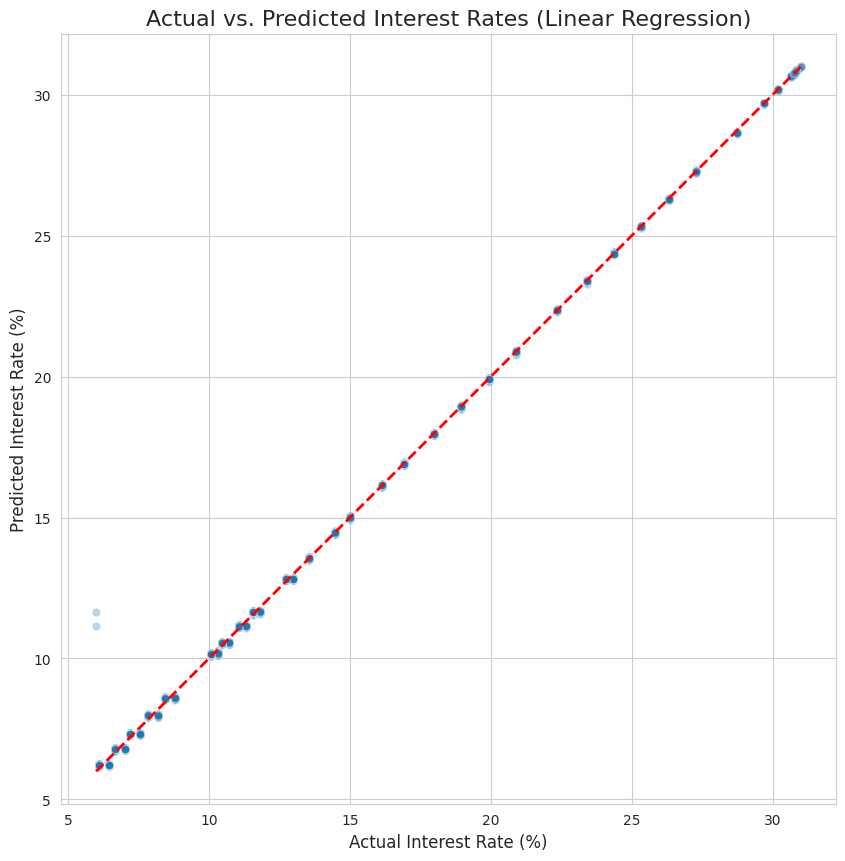

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.3)
# Plot the "perfect prediction" line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Interest Rates (Linear Regression)', fontsize=16)
plt.xlabel('Actual Interest Rate (%)', fontsize=12)
plt.ylabel('Predicted Interest Rate (%)', fontsize=12)
plt.axis('equal') # Ensure the x and y axes have the same scale
plt.grid(True)
plt.show()

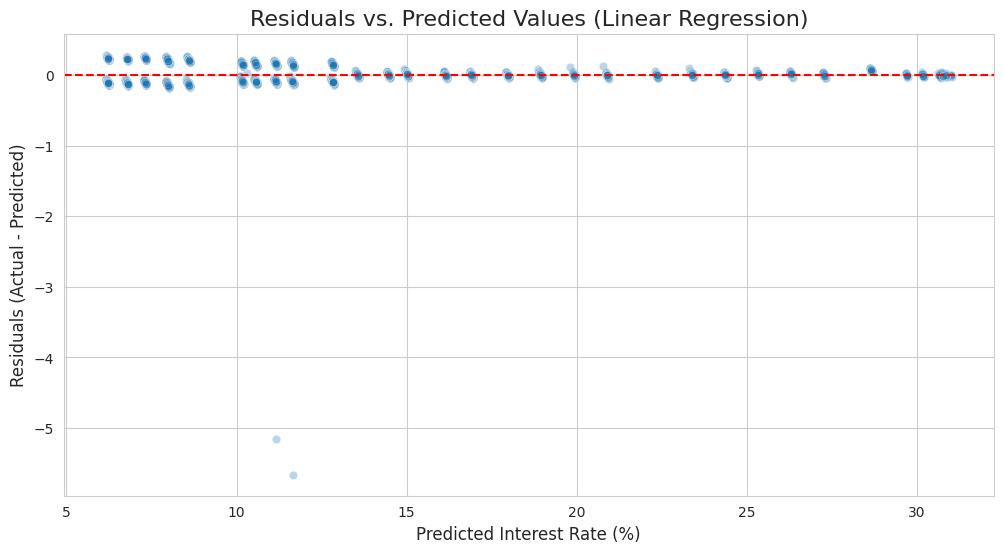

In [ ]:
# Calculate residuals
residuals = y_test - lr_preds

plt.figure(figsize=(12, 6))
sns.scatterplot(x=lr_preds, y=residuals, alpha=0.3)
# Plot the zero error line
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Linear Regression)', fontsize=16)
plt.xlabel('Predicted Interest Rate (%)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Create a dictionary to store our results
model_performance = {}

model_performance['Linear Regression'] = {
    'R2': lr_performance['R2'],
    'MAE': lr_performance['MAE'],
    'RMSE': lr_performance['RMSE'],
    'Training Time (s)': lr_training_time
}

# Display the performance so far in a DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print("\n--- Model Performance Summary ---")
print(performance_df)


--- Model Performance Summary ---
                         R2       MAE      RMSE  Training Time (s)
Linear Regression  0.999477  0.083756  0.117795           6.136312
